In [1]:
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install mdatagen
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install numpy scipy sklearn
!pip install jax
!pip install chex
!pip install attr
!pip install optax



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
sys.path.append(r"C:\Users\zhossai3\Desktop\Fair_Imputation") 


import Utils
import CMI
import Inject_Missing_Values
import RR_imputer
import Sinkhorn_CMI
import SinkhornImputation
import SoftImpute



c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [3]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from geomloss import SamplesLoss

from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from Utils import *
from SoftImpute import softimpute, cv_softimpute
from SinkhornImputation import SinkhornImputation
from Sinkhorn_CMI import *
from RR_imputer import RRimputer
import matplotlib.pyplot as plt
from CMI import *

from Inject_Missing_Values import *

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")
import pandas as pd

torch.set_default_tensor_type('torch.DoubleTensor')

**Load Data**

In [4]:
import pandas as pd

# Read CSV file into a Pandas DataFrame
groundTruth = pd.read_csv(r'C:\Users\zhossai3\Desktop\Fair_Imputation\Data\Student_performance_data _.csv', delimiter=',', header=0)

# Store feature columns in a DataFrame


X= groundTruth.iloc[:, :-1]  # Selects all rows and all columns except the last one
Y = groundTruth.iloc[:, -1]  # Selects all rows and only the last column


In [5]:
groundTruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 261.8 KB


Checking Number of unique values

In [6]:
groundTruth.nunique()

Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64

In [26]:
print("Age",groundTruth['Age'].unique())
print("Gender",groundTruth['Gender'].unique())
print("Ethnicity",groundTruth['Ethnicity'].unique())
print("ParentalEducation",groundTruth['ParentalEducation'].unique())
print("StudyTimeWeekly",groundTruth['StudyTimeWeekly'].unique())
print('Absences',groundTruth['Absences'].unique())
print('Tutoring',groundTruth['Tutoring'].unique())
print('ParentalSupport',groundTruth['ParentalSupport'].unique())
print('Extracurricular',groundTruth['Extracurricular'].unique())
print('Sports',groundTruth['Sports'].unique())
print('Music',groundTruth['Music'].unique())
print('Volunteering',groundTruth['Volunteering'].unique())
print('GPA',groundTruth['GPA'].unique())
print('GradeClass',groundTruth['GradeClass'].unique())

Age [17 18 15 16]
Gender [1 0]
Ethnicity [0 2 1 3]
ParentalEducation [2 1 3 4 0]
StudyTimeWeekly [19.83372281 15.40875606  4.21056977 ...  6.80549964 12.41665266
 17.81990749]
Absences [ 7  0 26 14 17 10 22  1 11 15 21  9 16 29  2 25 20  5  8 12 27 23  3 13
  6 28  4 18 19 24]
Tutoring [1 0]
ParentalSupport [2 1 3 4 0]
Extracurricular [0 1]
Sports [0 1]
Music [1 0]
Volunteering [0 1]
GPA [2.92919559 3.04291483 0.11260225 ... 1.14233288 1.80329676 2.14001388]
GradeClass [2 1 4 3 0]


In [8]:
groundTruth_tensor = torch.tensor(scale(groundTruth)) #converting groundTruth to Tensor, z-score scaling

In [9]:
print("minimum: ",groundTruth_tensor.min())
print("maximum:",groundTruth_tensor.max())
print("mean: ",groundTruth_tensor.mean())
print("median: ", groundTruth_tensor.median())

minimum:  tensor(-2.4186)
maximum: tensor(2.3155)
mean:  tensor(3.2675e-17)
median:  tensor(-0.4319)


Determining the appropriate columns for bucketization along with their respective bucket sizes, and identifying the variables X, Y, and Z for Conditional Mutual Information (CMI) computation.

In [10]:
bucket_specs = {
     
    0: 4,   # age (4 bins)
    1: 2,  # gender (2 bins)
    2: 4,  # ethinicity  
    13: 5,   # grade_class
    4: 5,  # studytime weekly
    5: 5, #absances
    6: 2, #Tutoring
    7: 5, #ParentalSupport
    8: 2 #Extracurricular


}

# Define multiple attributes for X, Y, Z
X_cols = [0,1,2]  # Bucketized sensitive attributes (e.g., sex, race, age)
Y_cols = [13]     # Bucketized outcome-related attributes
Z_cols = [4,5,6,7,8]  

**CMI for GroundTruth**

In [11]:
cmi_groundTruth = CMI.conditional_mutual_information(groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_groundTruth)

0.6519416078205015


Generating MCAR 25%, and added the target coloumn with the 25% missing MCAR data

In [12]:
generator_mcar25 = Inject_Missing_Values()
miss_mcar25,index_mcar25 = generator_mcar25.MCAR(X,missing_rate=25)
type(miss_mcar25)
total_missing_percentage_mar25= miss_mcar25.isnull().sum().sum() / miss_mcar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

missing_percentage = (miss_mcar25.isnull().sum() / len(miss_mcar25)) * 100
print(missing_percentage)

miss_mcar25 = pd.concat([miss_mcar25, Y], axis=1) #adding the target coloumn

Total Missing Percentage MAR25: 25.00%
Age                  25.752508
Gender               25.376254
Ethnicity            24.790970
ParentalEducation    25.627090
StudyTimeWeekly      24.665552
Absences             24.790970
Tutoring             24.958194
ParentalSupport      25.418060
Extracurricular      26.170569
Sports               23.285953
Music                24.832776
Volunteering         23.996656
GPA                  25.334448
dtype: float64


In [13]:
miss_mcar25_numpy = scale(miss_mcar25) #z-score scaling
miss_mcar25_tensor = torch.tensor(miss_mcar25_numpy) #converting to tensor

Applying Sinkhorn algorithm to MCAR 25% data

In [14]:
#only Sinkhorn
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
print(epsilon_mcar25)
mask_mcar25 = torch.isnan(miss_mcar25_tensor).double()


on_sk_imputer_mcar25 = SinkhornImputation(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mcar25, on_sk_maes25mcar, on_sk_rmses25mcar = on_sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mcar25_numpy = on_sk_imp_mcar25.detach().cpu().numpy()
on_sk_mae_mcar25 = MAE(on_sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
on_sk_rmse_mcar25 = RMSE(on_sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print(on_sk_mae_mcar25,on_sk_rmse_mcar25)

0.5098280608243914


INFO:root:batchsize = 128, epsilon = 0.5098
INFO:root:Iteration 0:	 Loss: 3.3516	 Validation MAE: 0.8759	RMSE: 1.0117
INFO:root:Iteration 50:	 Loss: 3.4206	 Validation MAE: 0.8337	RMSE: 1.0034
INFO:root:Iteration 100:	 Loss: 3.3986	 Validation MAE: 0.8129	RMSE: 0.9985
INFO:root:Iteration 150:	 Loss: 3.1884	 Validation MAE: 0.7998	RMSE: 0.9965
INFO:root:Iteration 200:	 Loss: 3.1777	 Validation MAE: 0.7896	RMSE: 0.9949
INFO:root:Iteration 250:	 Loss: 3.1652	 Validation MAE: 0.7809	RMSE: 0.9933
INFO:root:Iteration 300:	 Loss: 3.1487	 Validation MAE: 0.7747	RMSE: 0.9934
INFO:root:Iteration 350:	 Loss: 2.9906	 Validation MAE: 0.7691	RMSE: 0.9932
INFO:root:Iteration 400:	 Loss: 3.2458	 Validation MAE: 0.7644	RMSE: 0.9939
INFO:root:Iteration 450:	 Loss: 3.4523	 Validation MAE: 0.7606	RMSE: 0.9942
INFO:root:Iteration 500:	 Loss: 3.1670	 Validation MAE: 0.7583	RMSE: 0.9954
INFO:root:Iteration 550:	 Loss: 3.1262	 Validation MAE: 0.7566	RMSE: 0.9968
INFO:root:Iteration 600:	 Loss: 3.3346	 Validat

tensor(0.7433, grad_fn=<DivBackward0>) tensor(1.0109, grad_fn=<SqrtBackward0>)


Calculating CMI after applying the Sinkhorn Imputation (only Sinkhorn algorithm)

In [15]:
#only CMI
on_cmi_missmcar25 = CMI.conditional_mutual_information(on_sk_imp_mcar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmcar25)
print(on_sk_mae_mcar25,on_sk_rmse_mcar25)

0.6264718449188724
tensor(0.7433, grad_fn=<DivBackward0>) tensor(1.0109, grad_fn=<SqrtBackward0>)


Applying Sinkhorn-CMI algorithm to MCAR 25%

In [16]:
#sinkhorn_CMI
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mcar25)
mask_mcar25  = torch.isnan(miss_mcar25_tensor).double()


sk_imputer_mcar25 = SinkhornImputation_CMI(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar25, sk_maes25mcar, sk_rmses25mcar,cmi_loss_mcar25,sinkhorn_loss_mcar25 = sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mcar25_numpy = sk_imp_mcar25.detach().cpu().numpy()

sk_mae_mcar25 = MAE(sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
sk_rmse_mcar25 = RMSE(sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print(sk_mae_mcar25,sk_rmse_mcar25)





0.5148720297850543


INFO:root:Iteration 0:	 Loss: 6.9728	 Validation MAE: 0.8753	RMSE: 1.0123
INFO:root:Iteration 50:	 Loss: 6.7123	 Validation MAE: 0.8312	RMSE: 1.0032
INFO:root:Iteration 100:	 Loss: 6.6619	 Validation MAE: 0.8110	RMSE: 0.9980
INFO:root:Iteration 150:	 Loss: 6.8723	 Validation MAE: 0.7975	RMSE: 0.9947
INFO:root:Iteration 200:	 Loss: 6.6632	 Validation MAE: 0.7871	RMSE: 0.9927
INFO:root:Iteration 250:	 Loss: 6.3383	 Validation MAE: 0.7794	RMSE: 0.9917
INFO:root:Iteration 300:	 Loss: 6.2024	 Validation MAE: 0.7733	RMSE: 0.9923
INFO:root:Iteration 350:	 Loss: 6.4491	 Validation MAE: 0.7673	RMSE: 0.9913
INFO:root:Iteration 400:	 Loss: 6.5210	 Validation MAE: 0.7620	RMSE: 0.9907
INFO:root:Iteration 450:	 Loss: 6.8698	 Validation MAE: 0.7586	RMSE: 0.9912
INFO:root:Iteration 500:	 Loss: 6.3597	 Validation MAE: 0.7549	RMSE: 0.9911
INFO:root:Iteration 550:	 Loss: 6.1387	 Validation MAE: 0.7517	RMSE: 0.9914
INFO:root:Iteration 600:	 Loss: 6.1936	 Validation MAE: 0.7499	RMSE: 0.9929
INFO:root:Itera

tensor(0.7440, grad_fn=<DivBackward0>) tensor(1.0112, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn_CMI Imputation

In [17]:
#CMI
cmi_mcar25 = CMI.conditional_mutual_information(sk_imp_mcar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mcar25)
print(sk_mae_mcar25)

0.6201644144120662
tensor(0.7440, grad_fn=<DivBackward0>)


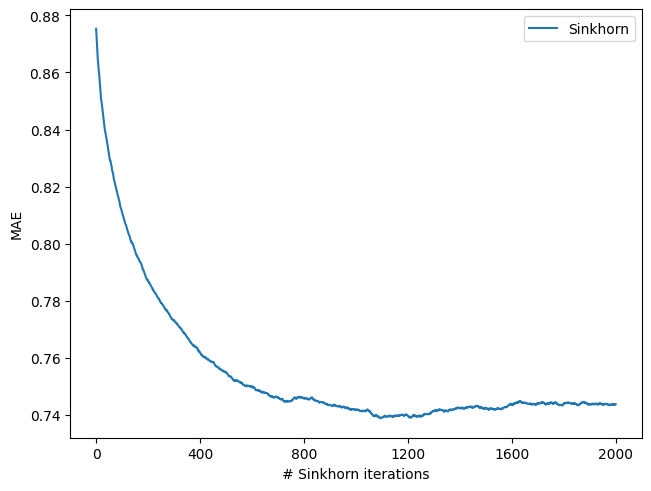

In [18]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes25mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes25mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')
ax.set_ylabel('MAE')
plt.legend()
plt.show()

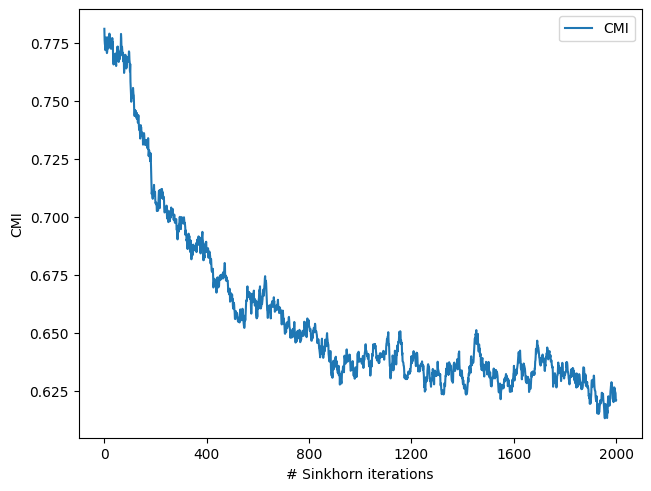

In [19]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(cmi_loss_mcar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, cmi_loss_mcar25, label='CMI')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('CMI')
plt.legend()
plt.show()

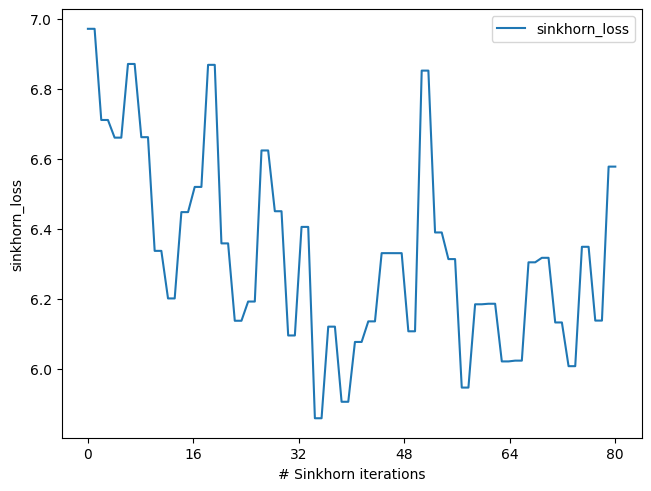

In [20]:
sinkhorn_loss_mcar25 = torch.tensor(sinkhorn_loss_mcar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mcar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mcar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

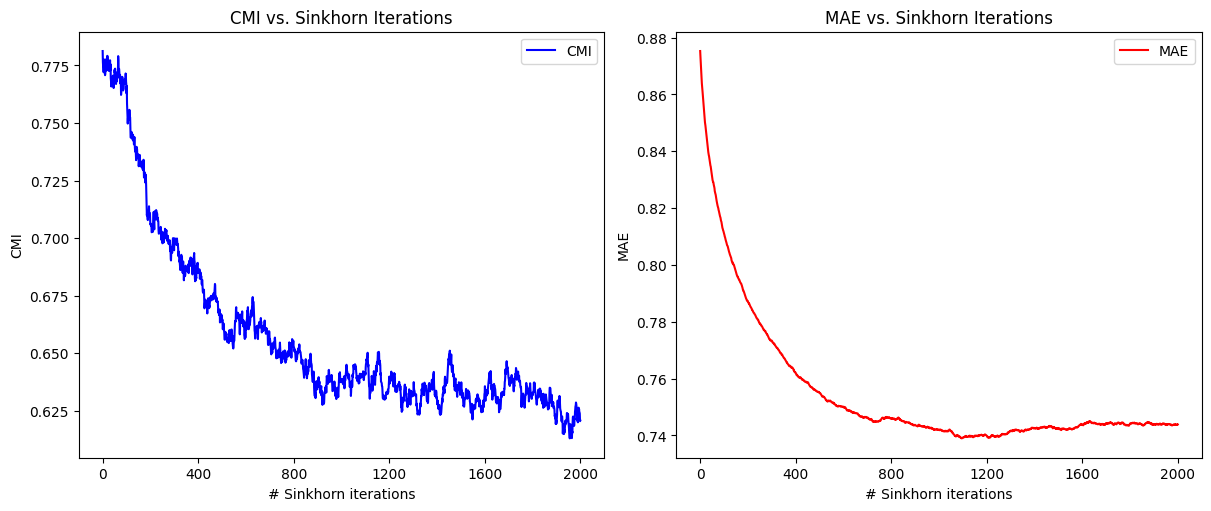

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mcar25)  # Length of CMI data
npoints_mae = len(sk_maes25mcar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mcar25, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes25mcar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


In [22]:
# Find the best trade-off index using the heuristic
best_tradeoff_idx = np.argmin(sinkhorn_loss_mcar25 + cmi_loss_mcar25)

# Get the corresponding values
best_cmi = cmi_loss_mcar25[best_tradeoff_idx]
best_mae = sk_maes25mcar[best_tradeoff_idx]

# Display the best trade-off values
best_tradeoff_idx, best_cmi, best_mae


TypeError: unsupported operand type(s) for +: 'Tensor' and 'list'

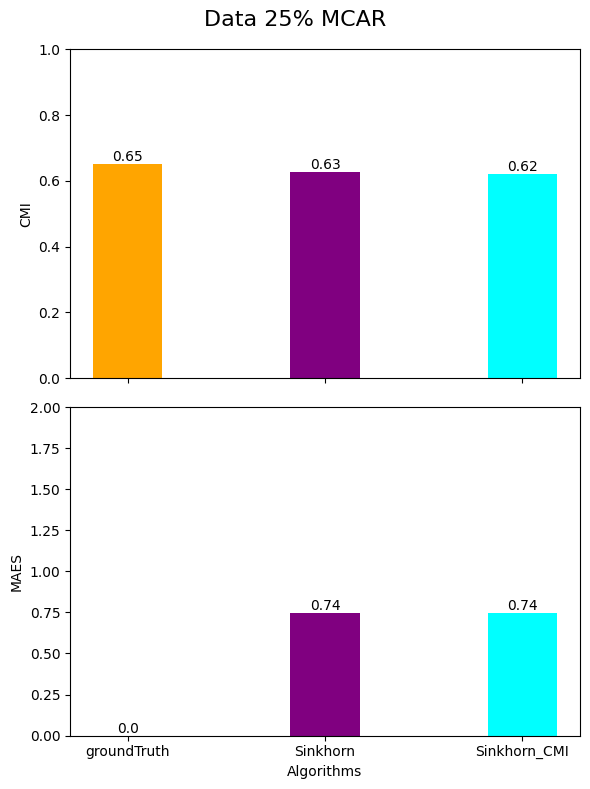

In [23]:

# Define values and categories
values_cmi_mcar25 = [cmi_groundTruth,on_cmi_missmcar25,cmi_mcar25]
values_maes_mcar25 = [0.0,on_sk_mae_mcar25.detach(),sk_mae_mcar25.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MCAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mcar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mcar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


**25% MAR**

In [30]:
dependencies_mar25 = {"ParentalEducation": {
        "influencers": ["Ethnicity"],
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Ethnicity"]<2 else 0.1
    },
    "ParentalSupport": {
        "influencers": ["Gender"],
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Gender"]==1 else 0.1 
    },
    "StudyTimeWeekly": {
        "influencers": ["GPA"],
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["GPA"]<=2.5 else 0.1 
    },
    "Absences": {
        "influencers": ["Tutoring"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Tutoring"]==1 else 0.1
    },
    "Extracurricular": {
        "influencers": ["Gender"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Gender"]==1 else 0.1 
    },
    
    "Volunteering": {
        "influencers": ["Age"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Age"]<=16 else 0.1
    },

    "Sports": {
        "influencers": ["Gender"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Gender"]==1 else 0.1 
    },


     "Music": {
        "influencers": ["Ethnicity"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Ethnicity"]<2 else 0.1 
    }
     



}

Generating MAR 25%, and added the target coloumn with the 25% missing MAR data

In [31]:
generator_mar25 = Inject_Missing_Values()
miss_mar25,index_mar25 = generator_mar25.MAR(X,dependencies_mar25,missing_rate=25)
miss_mar25 = pd.concat([miss_mar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mar25 = miss_mar25.isnull().sum().sum() / miss_mar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

Total Missing Percentage MAR25: 23.21%


In [32]:
missing_percentage = (miss_mar25.isnull().sum() / len(miss_mar25)) * 100
print(missing_percentage)

Age                   0.000000
Gender                0.000000
Ethnicity             0.000000
ParentalEducation    48.453177
StudyTimeWeekly      47.157191
Absences             30.685619
Tutoring              0.000000
ParentalSupport      38.461538
Extracurricular      39.297659
Sports               37.165552
Music                45.610368
Volunteering         38.168896
GPA                   0.000000
GradeClass            0.000000
dtype: float64


In [33]:
miss_mar25_numpy = scale(miss_mar25) #z-score scaling
miss_mar25_tensor = torch.tensor(miss_mar25_numpy) #converting to tensor

In [34]:
print(miss_mar25)

      Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0      17       1          0                NaN        19.833723       NaN   
1      18       0          0                NaN        15.408756       0.0   
2      15       0          2                3.0              NaN       NaN   
3      17       1          0                NaN        10.028829      14.0   
4      17       1          0                NaN         4.672495       NaN   
...   ...     ...        ...                ...              ...       ...   
2387   18       1          0                NaN        10.680555       2.0   
2388   17       0          0                1.0         7.583217       4.0   
2389   16       1          0                2.0              NaN      20.0   
2390   16       1          1                NaN        12.416653      17.0   
2391   16       1          0                NaN              NaN      13.0   

      Tutoring  ParentalSupport  Extracurricular  Sports  Music

Applying Sinkhorn algorithm to MAR 25% data

In [35]:
#only Sinkhorn
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
print(epsilon_mar25)
mask_mar25= torch.isnan(miss_mar25_tensor).double()


on_sk_imputer_mar25 = SinkhornImputation(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mar25, on_sk_maes25mar, on_sk_rmses25mar = on_sk_imputer_mar25.fit_transform(miss_mar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mar25_numpy = on_sk_imp_mar25.detach().cpu().numpy()
on_sk_mae_mar25 = MAE(on_sk_imp_mar25,groundTruth_tensor , mask_mar25)
on_sk_rmse_mar25 = RMSE(on_sk_imp_mar25, groundTruth_tensor, mask_mar25)
print(on_sk_mae_mar25,on_sk_rmse_mar25)

INFO:root:batchsize = 128, epsilon = 0.5168
INFO:root:Iteration 0:	 Loss: 3.0063	 Validation MAE: 0.8459	RMSE: 1.0058


0.5168039395070596


INFO:root:Iteration 50:	 Loss: 2.9375	 Validation MAE: 0.8028	RMSE: 0.9979
INFO:root:Iteration 100:	 Loss: 2.9942	 Validation MAE: 0.7844	RMSE: 0.9967
INFO:root:Iteration 150:	 Loss: 2.8649	 Validation MAE: 0.7725	RMSE: 0.9955
INFO:root:Iteration 200:	 Loss: 2.7968	 Validation MAE: 0.7628	RMSE: 0.9950
INFO:root:Iteration 250:	 Loss: 3.0182	 Validation MAE: 0.7549	RMSE: 0.9941
INFO:root:Iteration 300:	 Loss: 3.1452	 Validation MAE: 0.7485	RMSE: 0.9938
INFO:root:Iteration 350:	 Loss: 2.9115	 Validation MAE: 0.7426	RMSE: 0.9933
INFO:root:Iteration 400:	 Loss: 2.8826	 Validation MAE: 0.7385	RMSE: 0.9942
INFO:root:Iteration 450:	 Loss: 2.8907	 Validation MAE: 0.7362	RMSE: 0.9953
INFO:root:Iteration 500:	 Loss: 2.9976	 Validation MAE: 0.7334	RMSE: 0.9966
INFO:root:Iteration 550:	 Loss: 3.0817	 Validation MAE: 0.7308	RMSE: 0.9964
INFO:root:Iteration 600:	 Loss: 2.9197	 Validation MAE: 0.7289	RMSE: 0.9969
INFO:root:Iteration 650:	 Loss: 2.9718	 Validation MAE: 0.7278	RMSE: 0.9969
INFO:root:Ite

tensor(0.7178, grad_fn=<DivBackward0>) tensor(1.0041, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn Imputation

In [36]:
#only CMI
on_cmi_missmar25 = CMI.conditional_mutual_information(on_sk_imp_mar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmar25)
print(on_sk_mae_mar25)

0.5784410229620741
tensor(0.7178, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MAR 25% data

In [37]:
#sinkhorn_CMI
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mar25)
mask_mar25 = torch.isnan(miss_mar25_tensor).double()


sk_imputer_mar25 = SinkhornImputation_CMI(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mar25, sk_maes25mar, sk_rmses25mar,cmi_loss_mar25,sinkhorn_loss_mar25 = sk_imputer_mar25.fit_transform(miss_mar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mar25_numpy = sk_imp_mar25.detach().cpu().numpy()

sk_mae_mar25 = MAE(sk_imp_mar25,groundTruth_tensor , mask_mar25)
sk_rmse_mar25 = RMSE(sk_imp_mar25, groundTruth_tensor, mask_mar25)
print(sk_mae_mar25,sk_rmse_mar25)


0.510019855419454


INFO:root:Iteration 0:	 Loss: 6.7311	 Validation MAE: 0.8470	RMSE: 1.0065
INFO:root:Iteration 50:	 Loss: 6.1095	 Validation MAE: 0.8054	RMSE: 0.9995
INFO:root:Iteration 100:	 Loss: 6.1041	 Validation MAE: 0.7844	RMSE: 0.9954
INFO:root:Iteration 150:	 Loss: 6.0628	 Validation MAE: 0.7735	RMSE: 0.9952
INFO:root:Iteration 200:	 Loss: 6.1181	 Validation MAE: 0.7627	RMSE: 0.9938
INFO:root:Iteration 250:	 Loss: 6.0290	 Validation MAE: 0.7552	RMSE: 0.9936
INFO:root:Iteration 300:	 Loss: 5.4567	 Validation MAE: 0.7488	RMSE: 0.9934
INFO:root:Iteration 350:	 Loss: 5.4334	 Validation MAE: 0.7445	RMSE: 0.9943
INFO:root:Iteration 400:	 Loss: 5.7972	 Validation MAE: 0.7405	RMSE: 0.9946
INFO:root:Iteration 450:	 Loss: 6.6560	 Validation MAE: 0.7368	RMSE: 0.9946
INFO:root:Iteration 500:	 Loss: 5.6945	 Validation MAE: 0.7339	RMSE: 0.9954
INFO:root:Iteration 550:	 Loss: 5.6583	 Validation MAE: 0.7310	RMSE: 0.9951
INFO:root:Iteration 600:	 Loss: 6.2102	 Validation MAE: 0.7288	RMSE: 0.9958
INFO:root:Itera

tensor(0.7199, grad_fn=<DivBackward0>) tensor(1.0048, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn_CMI Imputation

In [38]:
#CMI
cmi_mar25 = CMI.conditional_mutual_information(sk_imp_mar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mar25)
print(sk_mae_mar25,sk_rmse_mar25)

0.5826616584169224
tensor(0.7199, grad_fn=<DivBackward0>) tensor(1.0048, grad_fn=<SqrtBackward0>)


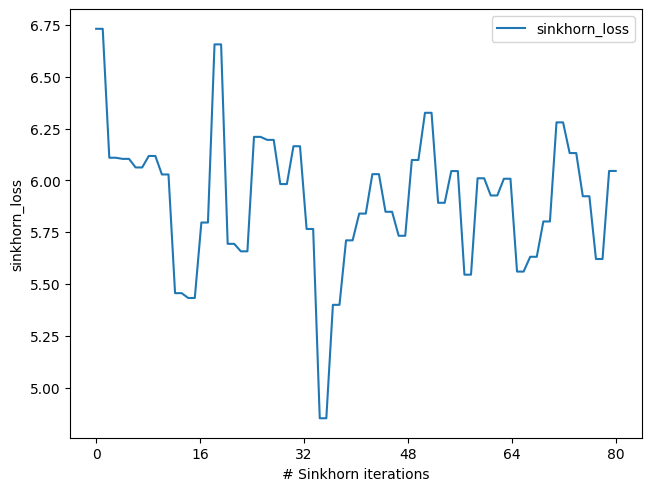

In [39]:
sinkhorn_loss_mar25 = torch.tensor(sinkhorn_loss_mar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

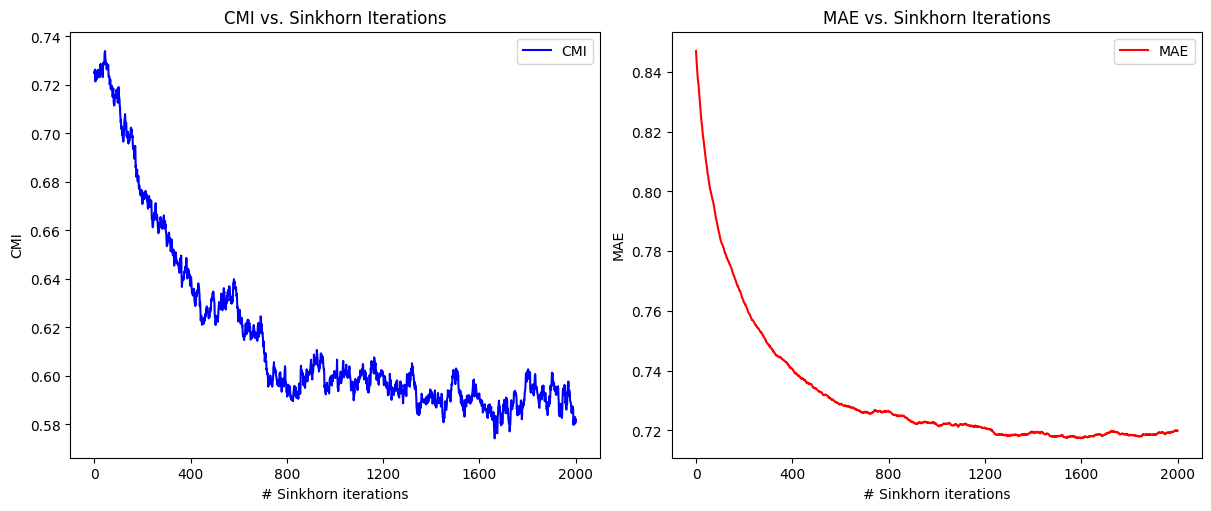

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mar25)  # Length of CMI data
npoints_mae = len(sk_maes25mar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mar25, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes25mar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


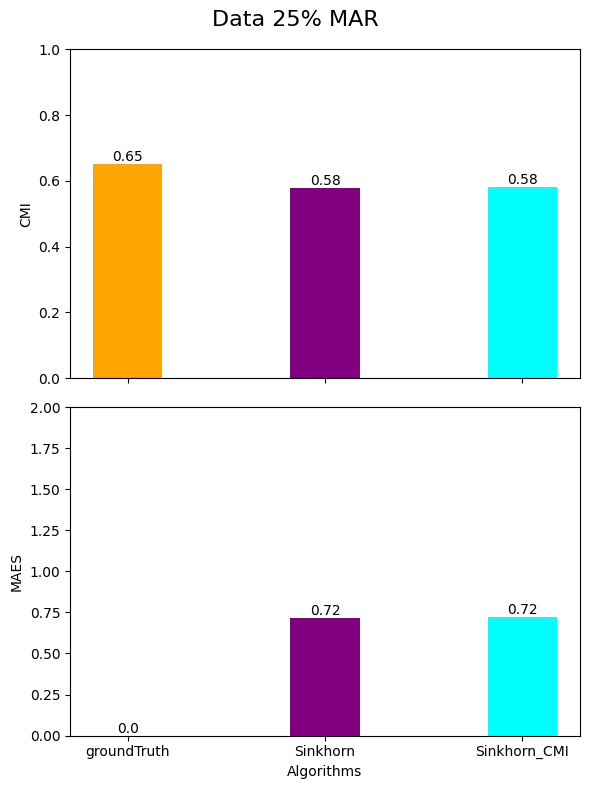

In [41]:

# Define values and categories
values_cmi_mar25 = [cmi_groundTruth,on_cmi_missmar25,cmi_mar25]
values_maes_mar25 = [0.0,on_sk_mae_mar25.detach(),sk_mae_mar25.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


In [ ]:
# Find the best trade-off index using the heuristic
best_tradeoff_idx = np.argmin(sinkhorn_loss_mar25 + cmi_loss_mar25)

# Get the corresponding values
best_cmi = cmi_loss_mar25[best_tradeoff_idx]
best_mae = sk_maes25mar[best_tradeoff_idx]

# Display the best trade-off values
best_tradeoff_idx, best_cmi, best_mae


**25% MNAR**

In [46]:
dependencies_mnar25 = {"ParentalEducation": {
       
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["ParentalEducation"]<2 else 0.1
    },
    "ParentalSupport": {
        
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["ParentalSupport"]<2 else 0.1 
    },
    "StudyTimeWeekly": {
        
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["StudyTimeWeekly"]<=10 else 0.1 
    },
    "Absences": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Absences"]>=20 else 0.1
    },
    "Extracurricular": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Extracurricular"]==1 else 0.1 
    },
    
    "Volunteering": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Volunteering"]==0 else 0.1
    },

    "Sports": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Sports"]==1 else 0.1 
    },


     "Music": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Music"]==0 else 0.1 
    },
    "Age": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Age"]<17 else 0.1 
    },
    "Gender": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Gender"]==1 else 0.1 
    },
    "GPA": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["GPA"]<2.5 else 0.1 
    },

    "Ethnicity": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Ethnicity"]<2 else 0.1 
    }
     



}

Generating MNAR 25%, and added the target coloumn with the 25% missing MNAR data

In [47]:
generator_mnar25 = Inject_Missing_Values()
miss_mnar25,index_mnar25 = generator_mnar25.MNAR(X,dependencies_mnar25,missing_rate=25)

miss_mnar25 = pd.concat([miss_mnar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mnar25 = miss_mnar25.isnull().sum().sum() / miss_mnar25.size * 100
print(f"Total Missing Percentage MNAR25: {total_missing_percentage_mnar25:.2f}%")

Total Missing Percentage MNAR25: 23.21%


In [48]:
missing_percentage = (miss_mnar25.isnull().sum() / len(miss_mnar25)) * 100
print(missing_percentage)

Age                  26.923077
Gender               24.122074
Ethnicity            31.939799
ParentalEducation    23.787625
StudyTimeWeekly      26.881271
Absences             21.112040
Tutoring              0.000000
ParentalSupport      20.693980
Extracurricular      21.948161
Sports               20.234114
Music                35.493311
Volunteering         38.586957
GPA                  33.277592
GradeClass            0.000000
dtype: float64


In [49]:
miss_mnar25_numpy = scale(miss_mnar25) #z-score scaling
miss_mnar25_tensor = torch.tensor(miss_mnar25_numpy) #converting to tensor

Applying Sinkhorn algorithm to MNAR 25% data

In [50]:
#only Sinkhorn
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
print(epsilon_mnar25)
mask_mnar25= torch.isnan(miss_mnar25_tensor).double()


on_sk_imputer_mnar25 = SinkhornImputation(eps=epsilon_mnar25, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mnar25, on_sk_maes25mnar, on_sk_rmses25mnar = on_sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mnar25_numpy = on_sk_imp_mnar25.detach().cpu().numpy()
on_sk_mae_mnar25 = MAE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
on_sk_rmse_mnar25 = RMSE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print(on_sk_mae_mnar25, on_sk_rmse_mnar25)

INFO:root:batchsize = 128, epsilon = 0.5144
INFO:root:Iteration 0:	 Loss: 3.0957	 Validation MAE: 0.8350	RMSE: 0.9661


0.514437329416473


INFO:root:Iteration 50:	 Loss: 3.2362	 Validation MAE: 0.8033	RMSE: 0.9648
INFO:root:Iteration 100:	 Loss: 3.1480	 Validation MAE: 0.7868	RMSE: 0.9635
INFO:root:Iteration 150:	 Loss: 3.4558	 Validation MAE: 0.7757	RMSE: 0.9638
INFO:root:Iteration 200:	 Loss: 3.0241	 Validation MAE: 0.7692	RMSE: 0.9655
INFO:root:Iteration 250:	 Loss: 3.2741	 Validation MAE: 0.7633	RMSE: 0.9658
INFO:root:Iteration 300:	 Loss: 3.0215	 Validation MAE: 0.7582	RMSE: 0.9665
INFO:root:Iteration 350:	 Loss: 3.1662	 Validation MAE: 0.7546	RMSE: 0.9676
INFO:root:Iteration 400:	 Loss: 3.0215	 Validation MAE: 0.7507	RMSE: 0.9676
INFO:root:Iteration 450:	 Loss: 2.9553	 Validation MAE: 0.7493	RMSE: 0.9692
INFO:root:Iteration 500:	 Loss: 3.0487	 Validation MAE: 0.7471	RMSE: 0.9698
INFO:root:Iteration 550:	 Loss: 3.4190	 Validation MAE: 0.7455	RMSE: 0.9716
INFO:root:Iteration 600:	 Loss: 3.1663	 Validation MAE: 0.7457	RMSE: 0.9743
INFO:root:Iteration 650:	 Loss: 3.2441	 Validation MAE: 0.7459	RMSE: 0.9765
INFO:root:Ite

tensor(0.7404, grad_fn=<DivBackward0>) tensor(0.9873, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn Imputation

In [51]:
#only CMI
on_cmi_missmnar25 = CMI.conditional_mutual_information(on_sk_imp_mnar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmnar25)
print(on_sk_mae_mnar25,on_sk_rmse_mnar25)

0.6437556903951651
tensor(0.7404, grad_fn=<DivBackward0>) tensor(0.9873, grad_fn=<SqrtBackward0>)


Applying Sinkhorn-CMI algorithm to MNAR 25% data

In [52]:
#sinkhorn_CMI
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mnar25)
mask_mnar25 = torch.isnan(miss_mnar25_tensor).double()


sk_imputer_mnar25 = SinkhornImputation_CMI(eps = epsilon_mnar25, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mnar25, sk_maes25mnar, sk_rmses25mnar,cmi_loss_mnar25, sinkhorn_loss_mnar25 = sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mnar25_numpy = sk_imp_mnar25.detach().cpu().numpy()

sk_mae_mnar25 = MAE(sk_imp_mnar25, groundTruth_tensor , mask_mnar25)
sk_rmse_mnar25 = RMSE(sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print(sk_mae_mnar25, sk_rmse_mnar25)





0.5137533253383892


INFO:root:Iteration 0:	 Loss: 6.9595	 Validation MAE: 0.8363	RMSE: 0.9669
INFO:root:Iteration 50:	 Loss: 6.4805	 Validation MAE: 0.8046	RMSE: 0.9661
INFO:root:Iteration 100:	 Loss: 7.0927	 Validation MAE: 0.7875	RMSE: 0.9637
INFO:root:Iteration 150:	 Loss: 6.6852	 Validation MAE: 0.7771	RMSE: 0.9637
INFO:root:Iteration 200:	 Loss: 6.5209	 Validation MAE: 0.7706	RMSE: 0.9659
INFO:root:Iteration 250:	 Loss: 6.4237	 Validation MAE: 0.7630	RMSE: 0.9659
INFO:root:Iteration 300:	 Loss: 6.6490	 Validation MAE: 0.7574	RMSE: 0.9664
INFO:root:Iteration 350:	 Loss: 6.2303	 Validation MAE: 0.7529	RMSE: 0.9670
INFO:root:Iteration 400:	 Loss: 6.6977	 Validation MAE: 0.7490	RMSE: 0.9670
INFO:root:Iteration 450:	 Loss: 6.6697	 Validation MAE: 0.7468	RMSE: 0.9685
INFO:root:Iteration 500:	 Loss: 6.1743	 Validation MAE: 0.7453	RMSE: 0.9702
INFO:root:Iteration 550:	 Loss: 6.1866	 Validation MAE: 0.7433	RMSE: 0.9712
INFO:root:Iteration 600:	 Loss: 6.0340	 Validation MAE: 0.7419	RMSE: 0.9728
INFO:root:Itera

tensor(0.7429, grad_fn=<DivBackward0>) tensor(0.9902, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn_CMI Imputation

In [53]:
#CMI
cmi_mnar25 = CMI.conditional_mutual_information(sk_imp_mnar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mnar25)
print(sk_mae_mnar25,sk_rmse_mnar25)

0.629208482455878
tensor(0.7429, grad_fn=<DivBackward0>) tensor(0.9902, grad_fn=<SqrtBackward0>)


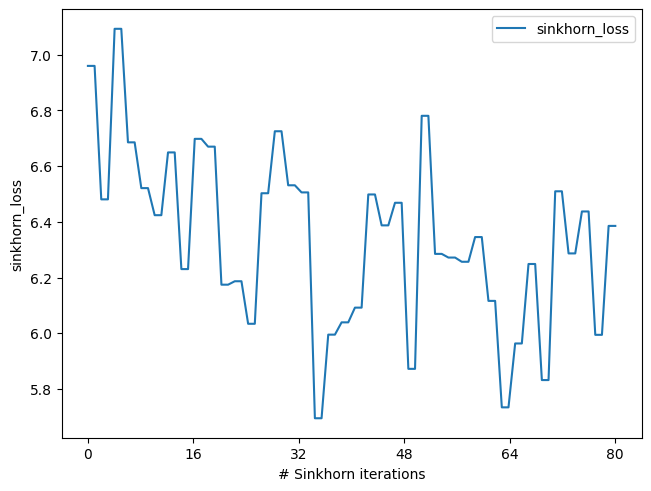

In [54]:
sinkhorn_loss_mnar25 = torch.tensor(sinkhorn_loss_mnar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mnar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mnar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

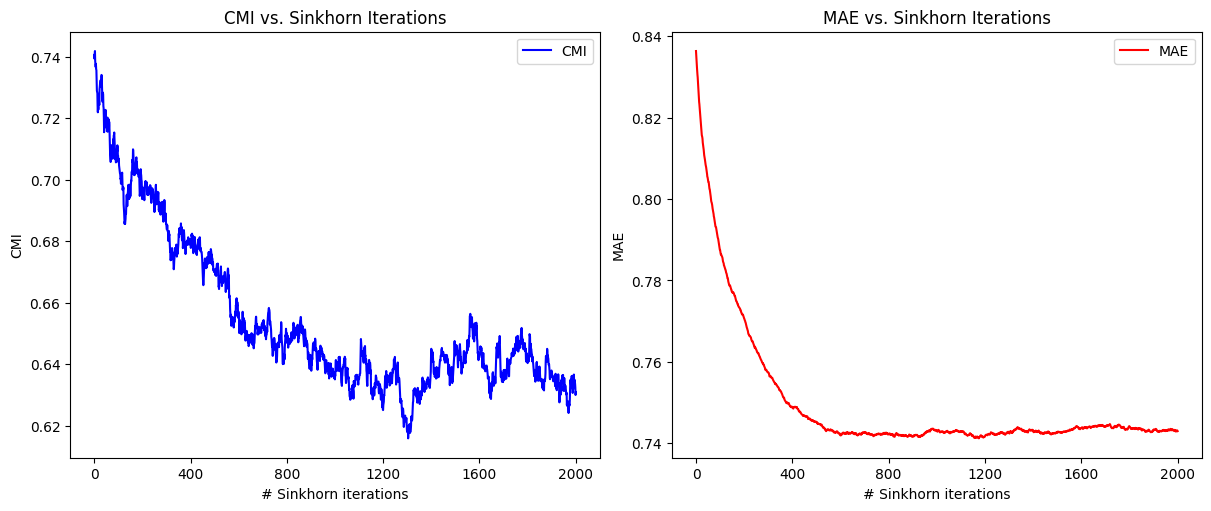

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mnar25)  # Length of CMI data
npoints_mae = len(sk_maes25mnar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mnar25, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes25mnar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


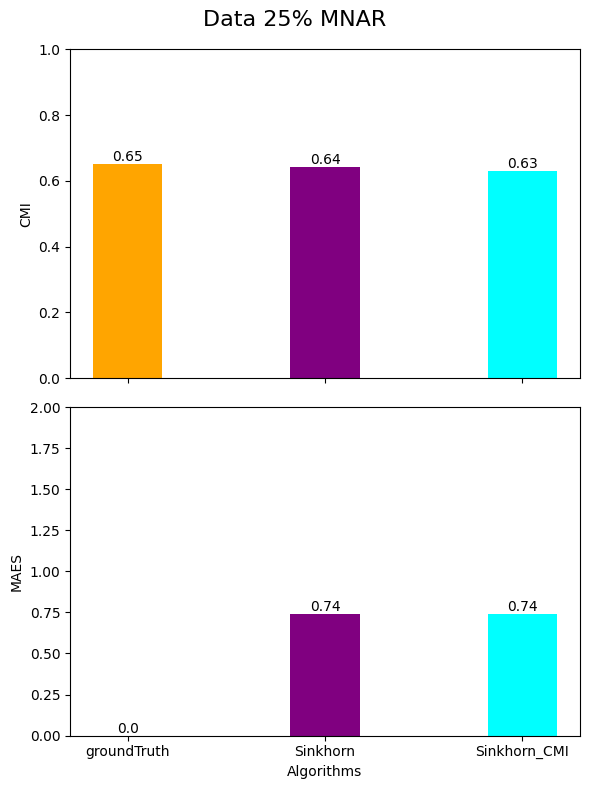

In [56]:

# Define values and categories
values_cmi_mnar25 = [cmi_groundTruth,on_cmi_missmnar25,cmi_mnar25]
values_maes_mnar25 = [0.0,on_sk_mae_mnar25.detach(),sk_mae_mnar25.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MNAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mnar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAES bars and add values on top
bars2 = ax2.bar(index, values_maes_mnar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()
